<a href="https://colab.research.google.com/github/kian79/MNIST_NN/blob/main/MNIST_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## فراخوانی کتابخانه‌های موردنیاز

In [ ]:
from sklearn.datasets import fetch_openml
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mnist = fetch_openml('mnist_784', version=1)
from tqdm import tqdm

گرفتن داده ورودی و برچسب آن

In [ ]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

تغییر اسکیل داده ورودی به اعدادی بین ۰تا۲۵۵

In [ ]:
X_scaled = X/256

In [ ]:
all_set = []
for i in range(len(y)):
  label = np.zeros((10,1))
  label[y[i],0] = 1
  all_set.append((X_scaled[i],label))

جدا کردن داده تست و ترین

In [ ]:
X_train, X_test, y_train, y_test, train_set, test_set = X_scaled[:60000], X_scaled[60000:], y[:60000], y[60000:], all_set[:60000], all_set[60000:]

تابعی برای نمایش تصاویر و برچسب آن‌ها

In [ ]:
def show_img(img_index, X1, y1):
  some_digit = X1[img_index]
  some_digit_image = some_digit.reshape(28, 28)
  plt.imshow(some_digit_image, cmap="binary")
  print(y1[img_index])
  plt.axis("off")
  plt.show()

9


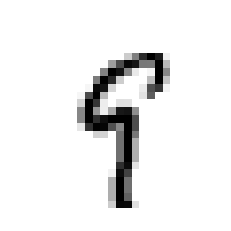

In [ ]:
show_img(54321,X,y)

تابع انجام الگوریتم با کمک حلقه و بدون وکتوریزیشن.
این الگوریتم با حلقه بسیار زیاد طول میکشد به همین خاطر با ۱۰۰داده‌ی اول فقط آن‌ را تست میکنیم.

In [ ]:
def SGD(train_set,W,b):
  batch_size = 10
  learning_rate = 1
  number_of_epochs = 20
  my_set = train_set[:100]
  for i in range(number_of_epochs):
    print(i)
    np.random.shuffle(my_set)
    batchs = []
    for i1 in range(0,len(my_set),batch_size):
      batchs.append(my_set[i1:i1+batch_size])
    for batch in batchs:
      # b_grad = []
      W2_grad = np.zeros((10,16))
      b2_grad = np.zeros((10,1))
      a2_grad = np.zeros((16,1))
      W1_grad = np.zeros((16,16))
      b1_grad = np.zeros((16,1))
      a1_grad = np.zeros((16,1))
      W0_grad = np.zeros((16,784))
      b0_grad = np.zeros((16,1))
      W_grad = [W0_grad, W1_grad, W2_grad]
      b_grad = [b0_grad, b1_grad, b2_grad]
      for image in batch:
        x = image[0]
        y = image[1]
        a, z = calculate_output(x,W,b)
        for j in range(10):
          b_grad[2][j,0] += 2*(a[2][j,0]-y[j])*sigmoid_deriv(z[2][j,0])
          for k in range(16):
            W_grad[2][j][k] += 2*(a[2][j,0]-y[j])*sigmoid_deriv(z[2][j,0])*a[1][k,0]
        for k in range(16):
          for j in range(10):
            a2_grad[k,0] += sigmoid_deriv(z[2][j,0])*W[2][j,k]*2*(a[2][j,0]-y[j])
        for j in range(16):
          b_grad[1][j,0] += a2_grad[j,0]*sigmoid_deriv(z[1][j,0])
          for k in range(16):
            W_grad[1][j][k] += a2_grad[j,0]*sigmoid_deriv(z[1][j,0])*a[1][k,0]
        for k in range(16):
          for j in range(16):
            a1_grad[k,0] += a2_grad[j,0]*sigmoid_deriv(z[1][j,0])*W[1][j,k]
        for j in range(16):
          b_grad[0][j,0] += a1_grad[j,0]*sigmoid_deriv(z[0][j,0])
          for k in range(784):
            W_grad[0][j][k] += a1_grad[j,0]*sigmoid_deriv(z[0][j,0])*x[k]
      for j in range(10):
        b[2][j,0] = b[2][j,0] - learning_rate*(b_grad[2][j,0]/batch_size)
        for k in range(16):
          W[2][j,k] = W[2][j,k] - learning_rate*(W_grad[2][j][k]/batch_size)
      for j in range(16):
        b[1][j,0] = b[1][j,0] - learning_rate*(b_grad[1][j,0]/batch_size)
        for k in range(16):
          W[1][j,k] = W[1][j,k] - learning_rate*(W_grad[1][j,k]/batch_size)
      for j in range(16):
        b[0][j,0] = b[0][j,0] - learning_rate*(b_grad[0][j,0]/batch_size)
        for k in range(784):
          W[0][j,k] = W[0][j,k] - learning_rate*(W_grad[0][j,k]/batch_size)
  return W,b

تابع محاسبه‌ی سیگموید و مشتق آن.
برای آنکه اورفلو نکند و به ارور نخوریم برای محاسبه‌ی سیگموید دو حالت در نظر گرفته‌ایم

In [ ]:
import math
def sigmoid(gamma):
  if gamma < 0:
    return 1 - 1/(1 + math.exp(gamma))
  else:
    return 1/(1 + math.exp(-gamma))
sigmoid = np.vectorize(sigmoid)

def sigmoid_deriv(x):
  return sigmoid(x)*(1-sigmoid(x))

این تابع هربار وزن‌ها و بایاس‌ها را با کمک اعداد رندوم در توزیع نرمال محاسبه میکند.

In [ ]:
def generate_rand():
  W0 = np.random.randn(16,784)
  b0 = np.random.randn(16,1)
  # np.zeros((16,1))
  W1 = np.random.randn(16,16)
  b1 = np.random.randn(16,1)
  b2 = np.random.randn(10,1)
  W2 = np.random.randn(10,16)
  W = [W0,W1,W2]
  b = [b0,b1,b2]
  return W,b  

این تابع خروجی را به ازای یک تصویر و وزن و بایاس ورودی محاسبه کرده و خروجی تمام نودهای هر مرحله را پس از اعمال سیگموید و قبل از آن برمیگرداند.

In [ ]:
def calculate_output(x,W,b):
  z = [0,0,0]
  a = [0,0,0]
  z[0] = np.matmul(W[0], x).reshape(16,1)+b[0]
  a[0] = sigmoid(z[0])
  z[1] = np.matmul(W[1], a[0]).reshape(16,1)+b[1]
  a[1] = sigmoid(z[1])
  z[2] = np.matmul(W[2], a[1]).reshape(10,1)+b[2]
  a[2] = sigmoid(z[2])
  return a,z


این تابع هزینه را محاسبه میکند به این شکل که مربع مجموع اختلاف از عدد واقعی را برای نودهای مرحله‌ی آخر به ما میدهد.

In [ ]:
def calculate_cost(a,y):
  cost = 0
  for i in range(10):
    cost += (a[i] - y[i])**2
  return cost

همان الگوریتم است فقط در اینجا بجای استفاده از حلقه به کمک وکتوریزیشن و کتابخانه‌ی نامپای محاسبات را انجام داده‌ایم تا سرعت اجرای آن بیشتر شود.

In [ ]:
def V_SGD(train_set, batch_size, learning_rate,number_of_epochs,end):
  # batch_size = 10
  # learning_rate = 1
  # number_of_epochs = 40
  W, b = generate_rand()
  costs = []
  my_set = train_set[:end].copy()
  # print(len(my_set))
  for i in tqdm(range(number_of_epochs)):
    cost = 0
    # print(i)
    np.random.shuffle(my_set)
    batchs = []
    for i1 in range(0,len(my_set),batch_size):
      batchs.append(my_set[i1:i1+batch_size])
    # print(f"len batch {len(batchs)}")
    for batch in batchs:
      W2_grad = np.zeros((10,16))
      b2_grad = np.zeros((10,1))
      a2_grad = np.zeros((16,1))
      W1_grad = np.zeros((16,16))
      b1_grad = np.zeros((16,1))
      a1_grad = np.zeros((16,1))
      W0_grad = np.zeros((16,784))
      b0_grad = np.zeros((16,1))
      W_grad = [W0_grad, W1_grad, W2_grad]
      b_grad = [b0_grad, b1_grad, b2_grad]
      for image in batch:
        x = image[0]
        y = image[1]
        # print(f"y : {np.argmax(y)}")
        a, z = calculate_output(x,W,b)
        # print(f"pred : {np.argmax(a[2])}")
        cost += calculate_cost(a[2],y)
        b_grad[2] += 2*sigmoid_deriv(z[2])*(a[2]-y)
        W_grad[2] += (2*sigmoid_deriv(z[2])*(a[2]-y)) @ np.transpose(a[1])
        a2_grad += np.transpose(W[2]) @ (2*sigmoid_deriv(z[2]) * (a[2]-y))
        b_grad[1] += a2_grad * sigmoid_deriv(z[1])
        W_grad[1] += a2_grad * sigmoid_deriv(z[1]) @ np.transpose(a[0])
        a1_grad += np.transpose(W[1]) @ (a2_grad * sigmoid_deriv(z[1]))
        b_grad[0] += a1_grad * sigmoid_deriv(z[0])
        x = x.reshape(784,1)
        W_grad[0] += (a1_grad * sigmoid_deriv(z[0])) @ np.transpose(x)
      b[2] = b[2] - learning_rate * (b_grad[2]/batch_size)
      W[2] = W[2] - learning_rate * (W_grad[2]/batch_size)
      b[1] = b[1] - learning_rate * (b_grad[1]/batch_size)
      W[1] = W[1] - learning_rate * (W_grad[1]/batch_size)
      b[0] = b[0] - learning_rate * (b_grad[0]/batch_size)
      W[0] = W[0] - learning_rate * (W_grad[0]/batch_size)
    costs.append(cost/len(my_set))
  return W,b,costs

حال برای ۱۰۰ داده‌ی اول با تعداد ۲۰۰ ایپاک و بچ سایز ۱۰ و لرنینگ ریت ۱ الگوریتم را تست میکنیم.

In [ ]:
W_f, b_f, costs = V_SGD(train_set, batch_size = 10, learning_rate = 1, number_of_epochs = 200, end = 100)

100%|██████████| 200/200 [00:23<00:00,  8.42it/s]


نمودار خطای الگوریتم را رسم میکنیم که به وضوح نزولی است.

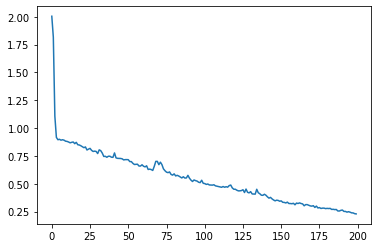

In [ ]:
plt.plot(costs)

دقت این الگوریتم ۸۷ درصد میباشد. روی این تعداد داده‌ی آموزش.

In [ ]:
set_f = train_set[:100]
result = []
l = []
for f in set_f:
  x = f[0]
  y = f[1]
  a, z = calculate_output(x,W_f,b_f)
  result.append(np.argmax(a[2]))
  l.append(np.argmax(f[1]))
accur = sum(1 for x,y in zip(l,result) if x == y) / 100
accur

0.87

حال که از صحت عملکرد الگوریتم مطمئن شدیم آن را روی تمام ۶۰هزار داده‌ی موجود آموزش میدهیم. اینکار در حدود ۵ دقیقه طول میکشد.

In [ ]:
W_trained, b_trained, costs = V_SGD(train_set,batch_size = 5,learning_rate = 1, number_of_epochs = 5,end = 60000)

100%|██████████| 5/5 [05:44<00:00, 68.86s/it]


حال نمودار خطای این الگوریتم را رسم میکنیم که باز هم کاملا نزولی می‌باشد.

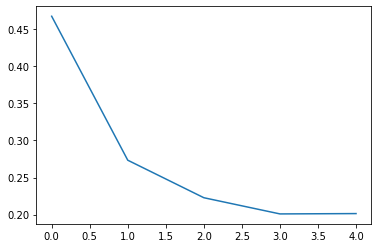

In [ ]:
plt.plot(costs)

حال دقت را روی همان داده‌های آموزش اندازه‌گیری میکنیم

In [ ]:
set_f = train_set
result = []
l = []
for f in set_f:
  x = f[0]
  y = f[1]
  a, z = calculate_output(x,W_trained,b_trained)
  result.append(np.argmax(a[2]))
  l.append(np.argmax(f[1]))

In [ ]:
accur = sum(1 for x,y in zip(l,result) if x == y) / len(set_f) * 100
print(f"accuracy is {accur}%")

accuracy is 88.75666666666666%


دقت روی داده‌های آموزش ۸۸ درصد بود حال دقت را روی تست اندازه میگیریم.

In [ ]:
set_t = test_set
result = []
l = []
for f in set_t:
  x = f[0]
  y = f[1]
  a, z = calculate_output(x,W_trained,b_trained)
  result.append(np.argmax(a[2]))
  l.append(np.argmax(f[1]))

In [ ]:
accur = sum(1 for x,y in zip(l,result) if x == y) / len(set_t) * 100
print(f"accuracy is {accur}%")

accuracy is 88.83%


حال که روی هر دو داده‌ی تست و آموزش نزدیک به ۹۰ درصد دقت داشتیم داده‌های تست را شیفت میدهیم و دقت را روی داده‌های جدید اندازه میگیریم.

In [ ]:
from scipy.ndimage.interpolation import shift

همانطور که در دو شکل پایین واضح است با شیفت دادن تصاویر تغییر محسوسی در آن‌ها ایجاد نمیشود و به چشم ما کاملا یکسان می‌آیند. حال باید ببینم شبکه‌ی عصبی ما توان تشخیص آن‌ها را دارد یا گول میخورد.

7


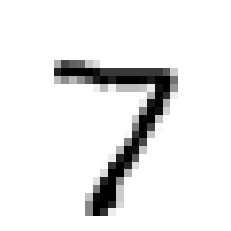

In [ ]:
x = [test_set[0][0]]
y = [np.argmax(test_set[0][1])]
show_img(0,x,y)
# print(y)

7


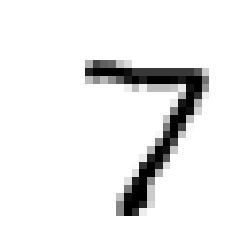

In [ ]:
x_s = shift(x, [0,4])
show_img(0,[x_s],y)

In [ ]:
shifted_test_set = []
for a_set in test_set:
  x = a_set[0]
  y = a_set[1]
  x1 = shift([x],[0,4]).reshape(784,)
  my_set = (x1, y)
  shifted_test_set.append(my_set)

In [ ]:
set_t = shifted_test_set
result = []
l = []

for f in set_t:
  x = f[0]
  y = f[1]
  a, z = calculate_output(x,W_trained,b_trained)
  result.append(np.argmax(a[2]))
  l.append(np.argmax(f[1]))
accur = sum(1 for x,y in zip(l,result) if x == y) / len(set_t) * 100
print(f"accuracy is {accur}%")

accuracy is 27.72%


مدل ما به راحتی گول میخورد و دقت آن از ۹۰ درصد به کمتر از ۳۰ درصد میرسد.

In [ ]:
def tanh_deriv(x):
  return 1-np.tanh(x)**2

در این قسمت همان الگوریتم را با تابع فعال‌سازی تانژانت هایپربولیک تست میکنیم.

In [ ]:
def tanh_calculate_output(x,W,b):
  z = [0,0,0]
  a = [0,0,0]
  z[0] = np.matmul(W[0], x).reshape(16,1)+b[0]
  a[0] = np.tanh(z[0])
  z[1] = np.matmul(W[1], a[0]).reshape(16,1)+b[1]
  a[1] = np.tanh(z[1])
  z[2] = np.matmul(W[2], a[1]).reshape(10,1)+b[2]
  a[2] = np.tanh(z[2])
  return a,z

In [ ]:
def tanh_V_SGD(train_set, batch_size, learning_rate,number_of_epochs,end):
  # batch_size = 10
  # learning_rate = 1
  # number_of_epochs = 40
  W, b = generate_rand()
  costs = []
  my_set = train_set[:end].copy()
  # print(len(my_set))
  for i in tqdm(range(number_of_epochs)):
    cost = 0
    print(i)
    np.random.shuffle(my_set)
    batchs = []
    for i1 in tqdm(range(0,len(my_set),batch_size)):
      batchs.append(my_set[i1:i1+batch_size])
    # print(f"len batch {len(batchs)}")
    for batch in batchs:
      W2_grad = np.zeros((10,16))
      b2_grad = np.zeros((10,1))
      a2_grad = np.zeros((16,1))
      W1_grad = np.zeros((16,16))
      b1_grad = np.zeros((16,1))
      a1_grad = np.zeros((16,1))
      W0_grad = np.zeros((16,784))
      b0_grad = np.zeros((16,1))
      W_grad = [W0_grad, W1_grad, W2_grad]
      b_grad = [b0_grad, b1_grad, b2_grad]
      for image in batch:
        x = image[0]
        y = image[1]
        # print(f"y : {np.argmax(y)}")
        a, z = calculate_output(x,W,b)
        # print(f"pred : {np.argmax(a[2])}")
        cost += calculate_cost(a[2],y)
        b_grad[2] += 2*tanh_deriv(z[2])*(a[2]-y)
        W_grad[2] += (2*tanh_deriv(z[2])*(a[2]-y)) @ np.transpose(a[1])
        a2_grad += np.transpose(W[2]) @ (2*tanh_deriv(z[2]) * (a[2]-y))
        b_grad[1] += a2_grad * tanh_deriv(z[1])
        W_grad[1] += a2_grad * tanh_deriv(z[1]) @ np.transpose(a[0])
        a1_grad += np.transpose(W[1]) @ (a2_grad * tanh_deriv(z[1]))
        b_grad[0] += a1_grad * tanh_deriv(z[0])
        x = x.reshape(784,1)
        W_grad[0] += (a1_grad * tanh_deriv(z[0])) @ np.transpose(x)
      b[2] = b[2] - learning_rate * (b_grad[2]/batch_size)
      W[2] = W[2] - learning_rate * (W_grad[2]/batch_size)
      b[1] = b[1] - learning_rate * (b_grad[1]/batch_size)
      W[1] = W[1] - learning_rate * (W_grad[1]/batch_size)
      b[0] = b[0] - learning_rate * (b_grad[0]/batch_size)
      W[0] = W[0] - learning_rate * (W_grad[0]/batch_size)
    costs.append(cost/len(my_set))
  return W,b,costs

In [ ]:
W_f, b_f, costs = tanh_V_SGD(train_set, batch_size = 10, learning_rate = 0.05, number_of_epochs = 10, end = 60000)

100%|██████████| 6000/6000 [00:00<00:00, 381763.11it/s]


0


100%|██████████| 6000/6000 [00:00<00:00, 315065.09it/s]


1


100%|██████████| 6000/6000 [00:00<00:00, 331722.87it/s]


2


100%|██████████| 6000/6000 [00:00<00:00, 356830.45it/s]


3


100%|██████████| 6000/6000 [00:00<00:00, 421757.09it/s]


4


100%|██████████| 6000/6000 [00:00<00:00, 322506.46it/s]


5


100%|██████████| 6000/6000 [00:00<00:00, 407207.39it/s]


6


100%|██████████| 6000/6000 [00:00<00:00, 364225.90it/s]


7


100%|██████████| 6000/6000 [00:00<00:00, 366304.10it/s]


8


100%|██████████| 6000/6000 [00:00<00:00, 444413.87it/s]


9


100%|██████████| 10/10 [05:19<00:00, 31.99s/it]


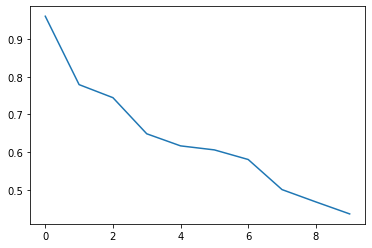

In [ ]:
plt.plot(costs)

In [ ]:
set_f = train_set
result = []
l = []
for f in set_f:
  x = f[0]
  y = f[1]
  a, z = calculate_output(x,W_f,b_f)
  result.append(np.argmax(a[2]))
  l.append(np.argmax(f[1]))

In [ ]:
accur = sum(1 for x,y in zip(l,result) if x == y) / len(set_f) * 100
print(f"accuracy is {accur}%")

accuracy is 70.34166666666667%


دقت کمتر است ولی با تغییر دادن هایپرپارامترها میتوان آن را به بالای ۸۰ رساند.

حال میخواهیم از الگوریتم 

batch gradient descent

استفاده کنیم.

In [ ]:
def BGD(train_set, learning_rate,number_of_epochs,end):
  # batch_size = 10
  # learning_rate = 1
  # number_of_epochs = 40
  W, b = generate_rand()
  costs = []
  my_set = train_set[:end].copy()
  # print(len(my_set))
  for i in tqdm(range(number_of_epochs)):
    cost = 0
    # print(i)
    # np.random.shuffle(my_set)
    # batchs = []
    # for i1 in range(0,len(my_set),batch_size):
      # batchs.append(my_set[i1:i1+batch_size])
    # print(f"len batch {len(batchs)}")
    # for batch in batchs:
    W2_grad = np.zeros((10,16))
    b2_grad = np.zeros((10,1))
    a2_grad = np.zeros((16,1))
    W1_grad = np.zeros((16,16))
    b1_grad = np.zeros((16,1))
    a1_grad = np.zeros((16,1))
    W0_grad = np.zeros((16,784))
    b0_grad = np.zeros((16,1))
    W_grad = [W0_grad, W1_grad, W2_grad]
    b_grad = [b0_grad, b1_grad, b2_grad]
    for image in my_set:
      x = image[0]
      y = image[1]
      # print(f"y : {np.argmax(y)}")
      a, z = calculate_output(x,W,b)
      # print(f"pred : {np.argmax(a[2])}")
      cost += calculate_cost(a[2],y)
      b_grad[2] += 2*sigmoid_deriv(z[2])*(a[2]-y)
      W_grad[2] += (2*sigmoid_deriv(z[2])*(a[2]-y)) @ np.transpose(a[1])
      a2_grad += np.transpose(W[2]) @ (2*sigmoid_deriv(z[2]) * (a[2]-y))
      b_grad[1] += a2_grad * sigmoid_deriv(z[1])
      W_grad[1] += a2_grad * sigmoid_deriv(z[1]) @ np.transpose(a[0])
      a1_grad += np.transpose(W[1]) @ (a2_grad * sigmoid_deriv(z[1]))
      b_grad[0] += a1_grad * sigmoid_deriv(z[0])
      x = x.reshape(784,1)
      W_grad[0] += (a1_grad * sigmoid_deriv(z[0])) @ np.transpose(x)
    b[2] = b[2] - learning_rate * (b_grad[2]/len(my_set))
    W[2] = W[2] - learning_rate * (W_grad[2]/len(my_set))
    b[1] = b[1] - learning_rate * (b_grad[1]/len(my_set))
    W[1] = W[1] - learning_rate * (W_grad[1]/len(my_set))
    b[0] = b[0] - learning_rate * (b_grad[0]/len(my_set))
    W[0] = W[0] - learning_rate * (W_grad[0]/len(my_set))
    costs.append(cost/len(my_set))
  return W,b,costs

In [ ]:
W_f, b_f, costs = BGD(train_set, learning_rate = 0.01, number_of_epochs = 200, end = 100)

100%|██████████| 200/200 [00:23<00:00,  8.50it/s]


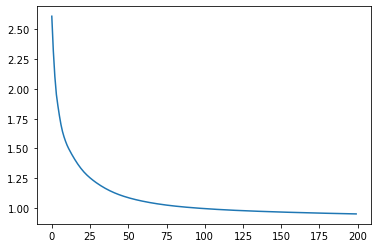

In [ ]:
plt.plot(costs)

In [ ]:
set_f = train_set[:100]
result = []
l = []
for f in set_f:
  x = f[0]
  y = f[1]
  a, z = calculate_output(x,W_f,b_f)
  result.append(np.argmax(a[2]))
  l.append(np.argmax(f[1]))
accur = sum(1 for x,y in zip(l,result) if x == y) / 100
accur

0.12

In [ ]:
W_f, b_f, costs = BGD(train_set, learning_rate = 1, number_of_epochs = 5, end = 60000)

100%|██████████| 5/5 [05:29<00:00, 65.81s/it]


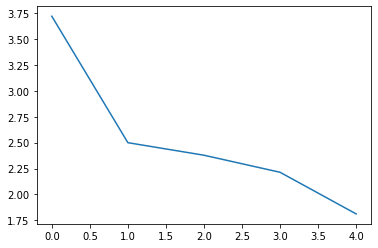

In [ ]:
 plt.plot(costs)